In [312]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('tmdb_5000_movies.csv')

In [229]:
df = df.reset_index()
df[:2]

,index,budget,genre1,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre2,genre3-id,genre3
0,0,237000000,Action,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure,14.0,Fantasy
1,1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Fantasy,28.0,Action


In [ ]:
for i in range(len(df)): 
    if df['genre1'][i] == 'Action': 
        z['value'][i] = 1
    elif df['genre1'][i] == 'Adventure': 
         z['value'][i] = 2
    elif df['genre1'][i] == 'Animation': 
        z['value'][i] = 3
    elif df['genre1'][i] == 'Comedy': 
        z['value'][i] = 4
    elif df['genre1'][i] == 'Crime': 
        z['value'][i] = 5
    elif df['genre1'][i] == 'Drama': 
        z['value'][i] = 6
    elif df['genre1'][i] == 'Family': 
        z['value'][i] = 7
    elif df['genre1'][i] == 'Fantasy': 
        z['value'][i] = 8
    elif df['genre1'][i] == 'History': 
        z['value'][i] = 9
    elif df['genre1'][i] == 'Horror': 
        z['value'][i] = 10
    elif df['genre1'][i] == 'Mystery': 
        z['value'][i] = 11
    elif df['genre1'][i] == 'Music': 
        z['value'][i] = 12
    elif df['genre1'][i] == 'Romance': 
        z['value'][i] = 13
    elif df['genre1'][i] == 'Science Fiction': 
        z['value'][i] = 14
    elif df['genre1'][i] == 'Thriller': 
        z['value'][i] = 15
    elif df['genre1'][i] == 'War': 
        z['value'][i] = 16
    elif df['genre1'][i] == 'Western': 
        z['value'][i] = 17
    else: 
        pass

In [ ]:
z = pd.DataFrame(z['value'])

In [238]:
df['new_genre'] = z

In [239]:
df[:2]

,index,budget,genre1,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,genre2,genre3-id,genre3,new_genre
0,1,237000000,Action,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure,14.0,Fantasy,1
1,2,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Fantasy,28.0,Action,2


In [253]:
x = x.loc[x['new_genre'] <= 17]

In [259]:
x = x[['popularity', 'revenue', 'vote_average', 'vote_count', 'new_genre']].copy()

In [260]:
x

,popularity,revenue,vote_average,vote_count,new_genre
0,150.437577,2787965087,7.2,11800,1
1,139.082615,961000000,6.9,4500,2
2,107.376788,880674609,6.3,4466,1
3,112.312950,1084939099,7.6,9106,1
4,43.926995,284139100,6.1,2124,1
...,...,...,...,...,...
4795,0.918116,0,6.0,1,6
4796,23.307949,424760,6.9,658,14
4798,14.269792,2040920,6.6,238,1
4799,0.642552,0,5.9,5,4


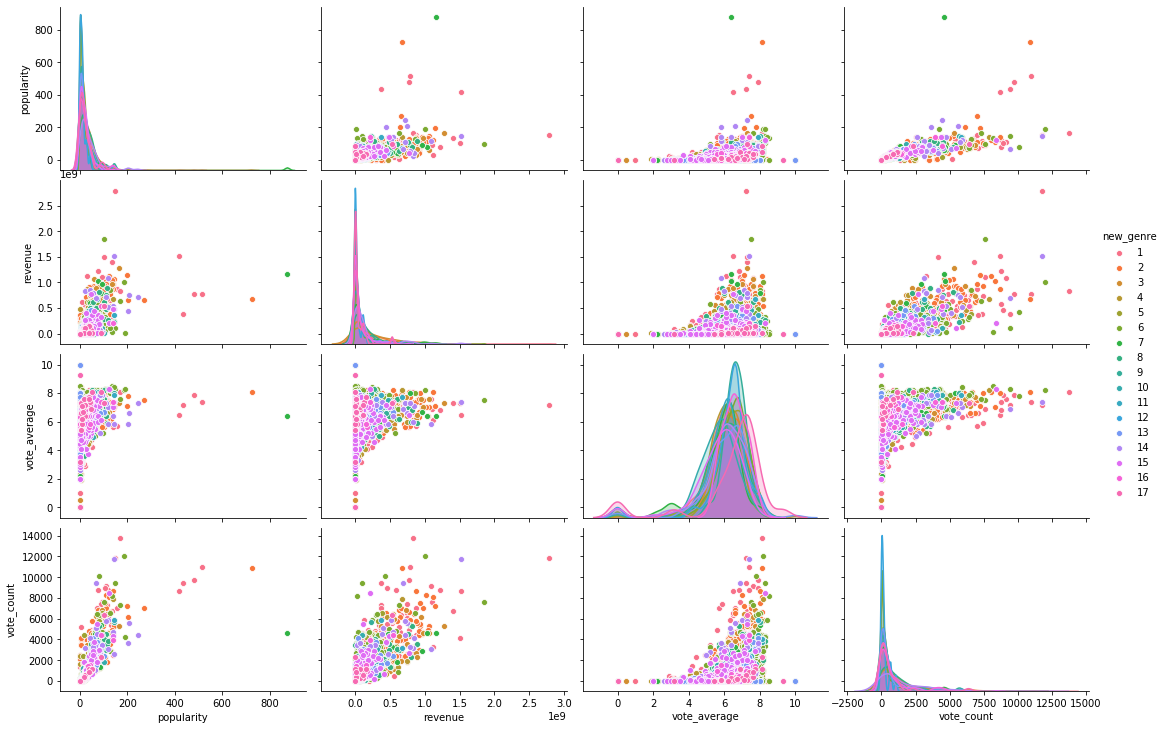

In [261]:
sns.pairplot(x, hue = 'new_genre', aspect = 1.5)
plt.show()

### KMeans

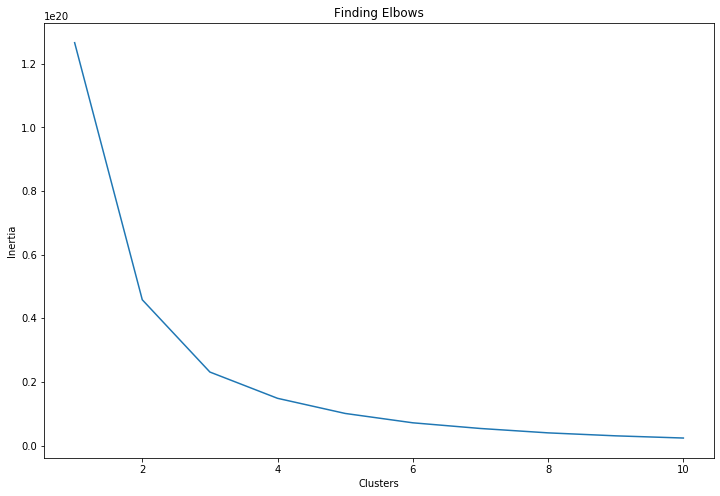

In [269]:
from sklearn.cluster import KMeans 

from sklearn.cluster import KMeans
km = KMeans()

clusters = [] 

for i in range(1,11): 
    km = KMeans(n_clusters = i).fit(x)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax) 
ax.set_title('Finding Elbows') 
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

We see significant elbow movements at clusters 2 and 3

#### 2 Clusters

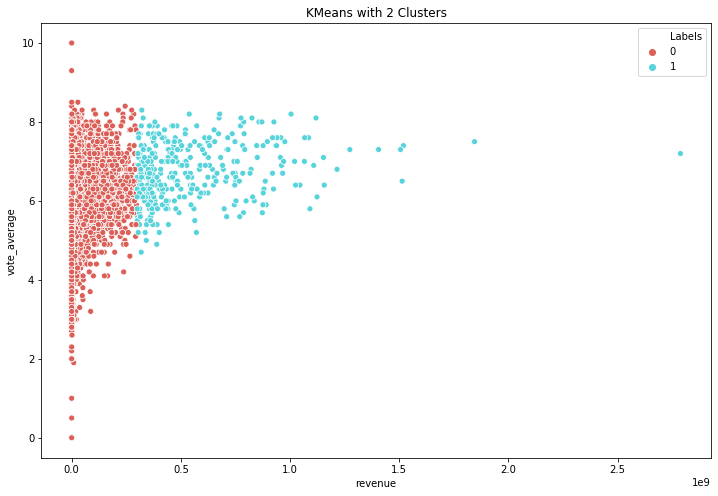

In [275]:
km2 = KMeans(n_clusters = 2).fit(x) 

x['Labels'] = km2.labels_
plt.figure(figsize = (12,8));
sns.scatterplot(x['revenue'], x['vote_average'], hue = x['Labels'],
               palette = sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters') 
plt.show()

#### 3 Clusters

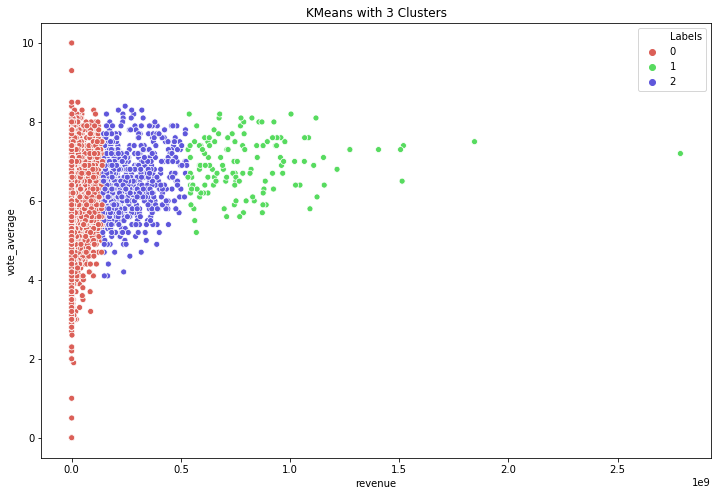

In [282]:
km2 = KMeans(n_clusters = 3).fit(x) 

x['Labels'] = km2.labels_
plt.figure(figsize = (12,8));
sns.scatterplot(x['revenue'], x['vote_average'], hue = x['Labels'],
               palette = sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters') 
plt.show()

#### 4 Clusters

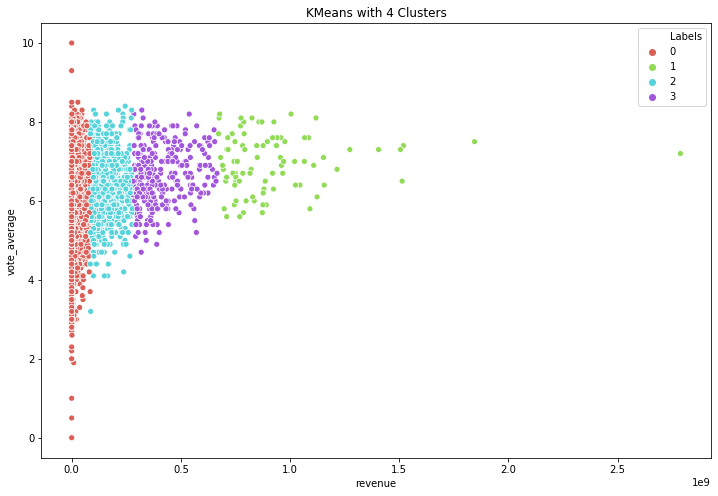

In [283]:
km2 = KMeans(n_clusters = 4).fit(x) 

x['Labels'] = km2.labels_
plt.figure(figsize = (12,8));
sns.scatterplot(x['revenue'], x['vote_average'], hue = x['Labels'],
               palette = sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters') 
plt.show()

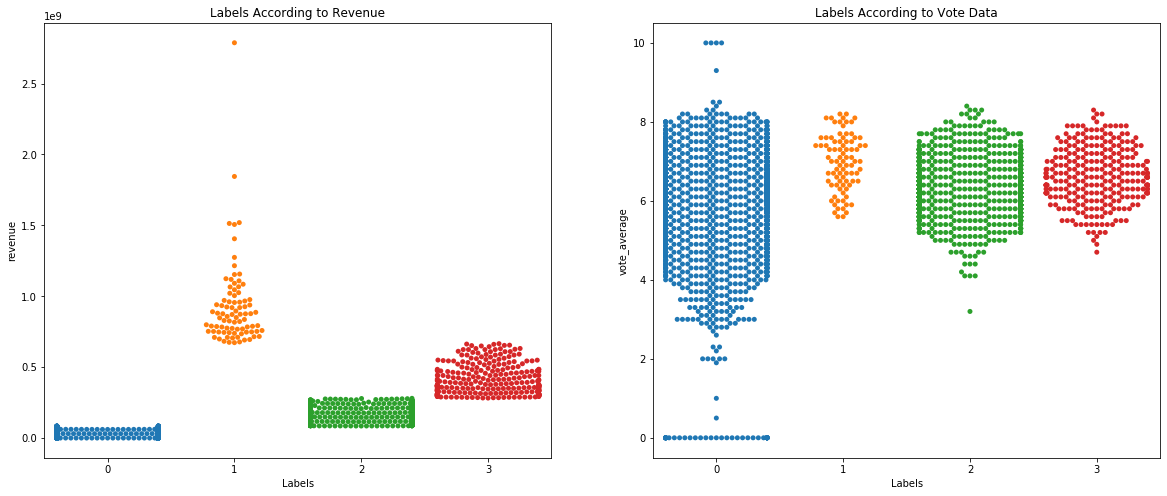

In [286]:
fig = plt.figure(figsize = (20, 8)) 
ax = fig.add_subplot(121) 
sns.swarmplot(x = 'Labels', y = 'revenue', data = x, ax = ax) 
ax.set_title('Labels According to Revenue') 

ax = fig.add_subplot(122) 
sns.swarmplot(x = 'Labels', y = 'vote_average', data = x, ax = ax) 
ax.set_title('Labels According to Vote Data') 

plt.show()

### DBSCAN

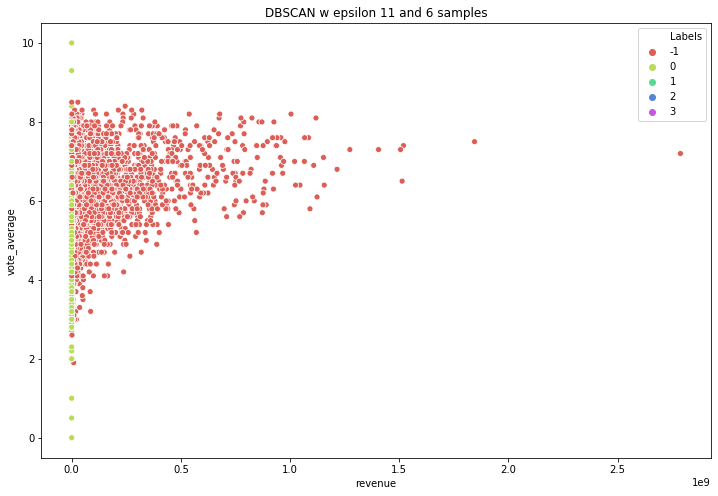

In [306]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 10, min_samples = 6).fit(x)

x['Labels'] = db.labels_
plt.figure(figsize = (12,8)) 
sns.scatterplot(x['revenue'], x['vote_average'], hue = x['Labels'], 
               palette = sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN w epsilon 11 and 6 samples') 
plt.show()

### MeanShift

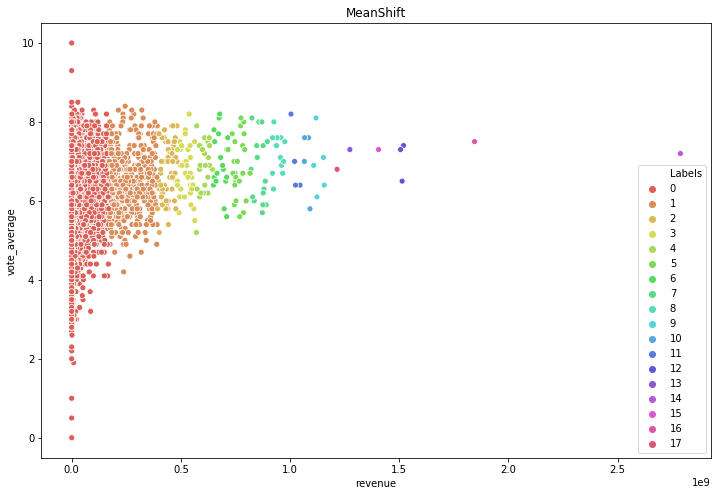

In [308]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwith = estimate_bandwidth(x, quantile = .1)
ms = MeanShift(bandwith).fit(x)

x['Labels'] = ms.labels_ 
plt.figure(figsize = (12,8)) 
sns.scatterplot(x['revenue'], x['vote_average'], hue = x['Labels'], 
               palette = sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

### Throw it all together

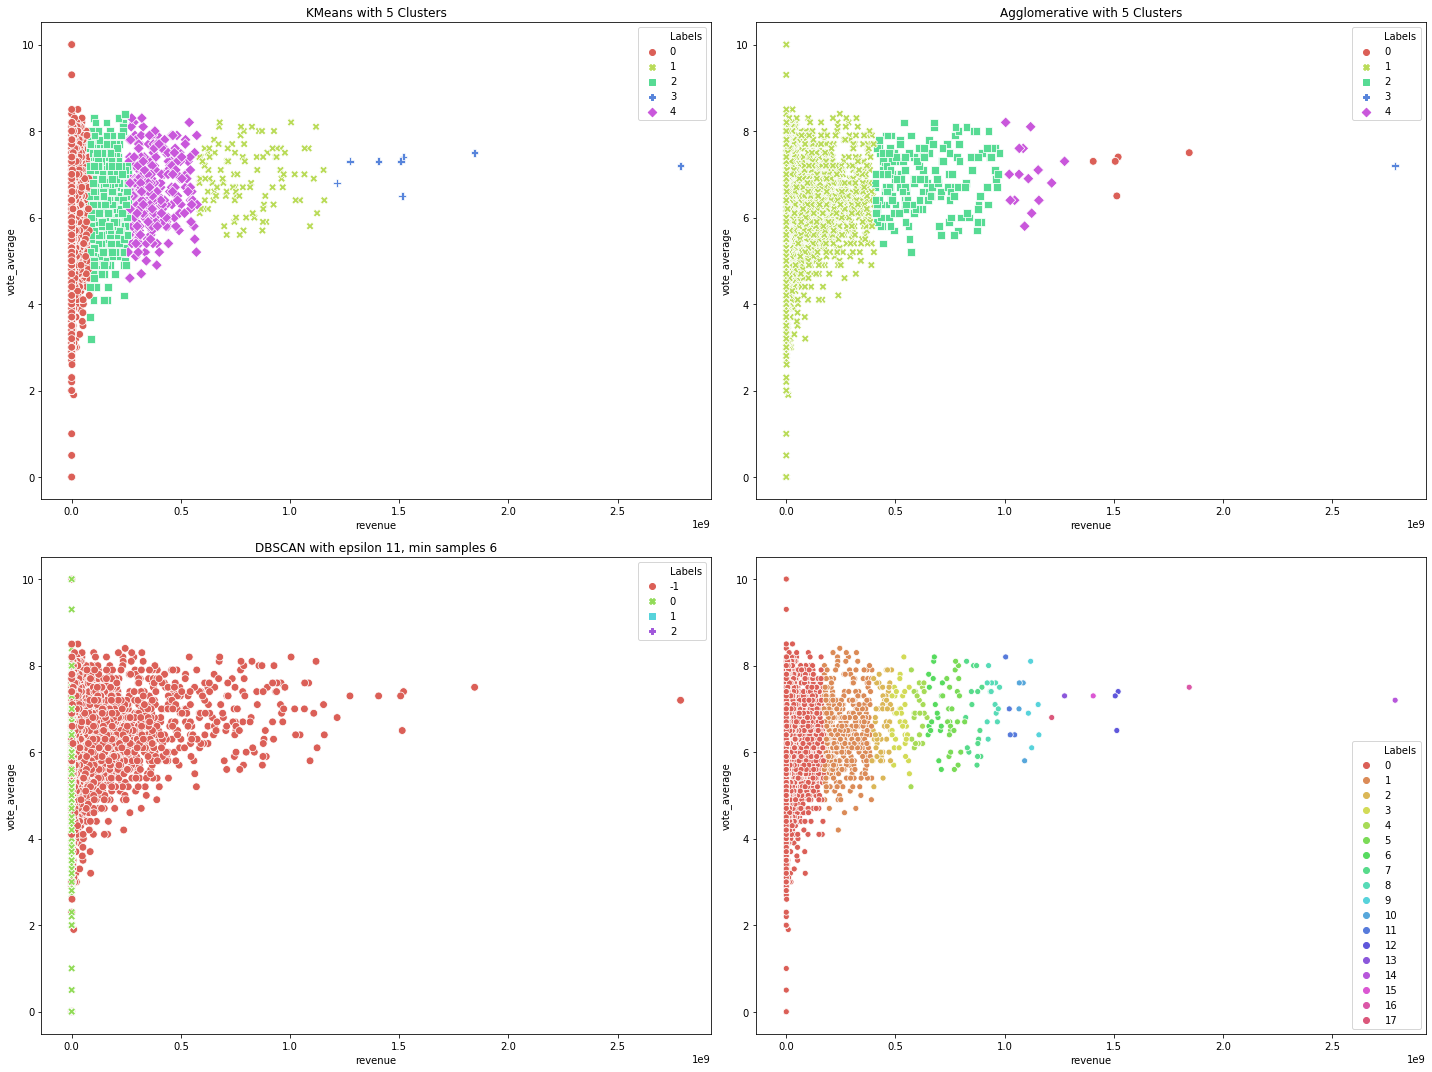

In [317]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(x)
x['Labels'] = km5.labels_
sns.scatterplot(x['revenue'], x['vote_average'], hue=x['Labels'], style=x['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(x)
x['Labels'] = agglom.labels_
sns.scatterplot(x['revenue'], x['vote_average'], hue=x['Labels'], style=x['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(x)
x['Labels'] = db.labels_
sns.scatterplot(x['revenue'], x['vote_average'], hue=x['Labels'], style=x['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwith = estimate_bandwidth(x, quantile = .1)
ms = MeanShift(bandwith).fit(x)

x['Labels'] = ms.labels_  
sns.scatterplot(x['revenue'], x['vote_average'], hue = x['Labels'], 
               palette = sns.color_palette('hls', np.unique(ms.labels_).shape[0]))


plt.tight_layout()
plt.show()